# 6.6 Time Series Forecasting in Python Bonus

### This script contains the following:

#### 1. Defining Your Parameters
#### 2. Splitting the Data
#### 3. Running and Fitting the Model
#### 4. Iterating

### 1. Defining Your Parameters

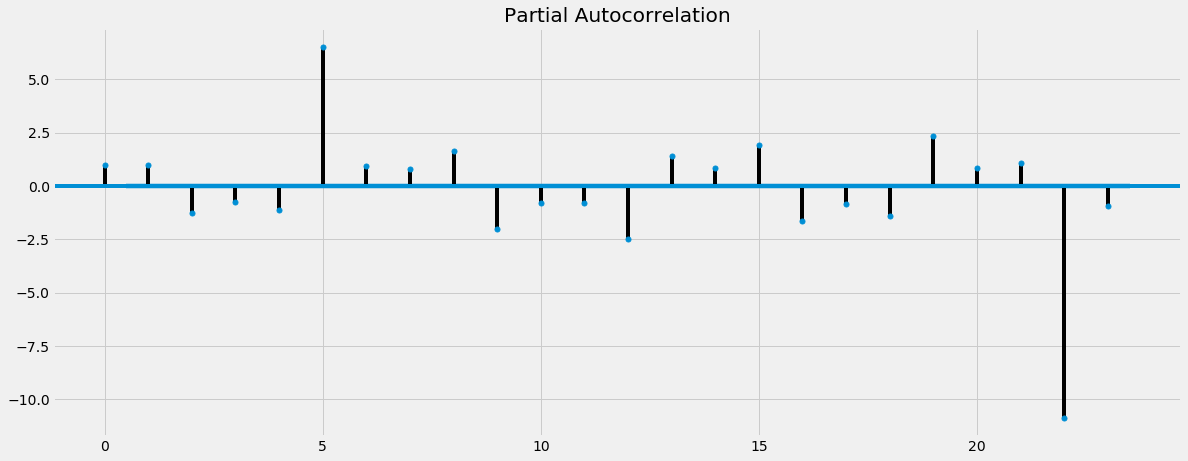

<Figure size 4500x4500 with 0 Axes>

In [30]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

In the figure above, you can see that you have some highly positive bars. These indicate significant correlations. Let’s start by picking 5 AR terms to compensate for the highest of the partial autocorrelations. This makes p = 5.


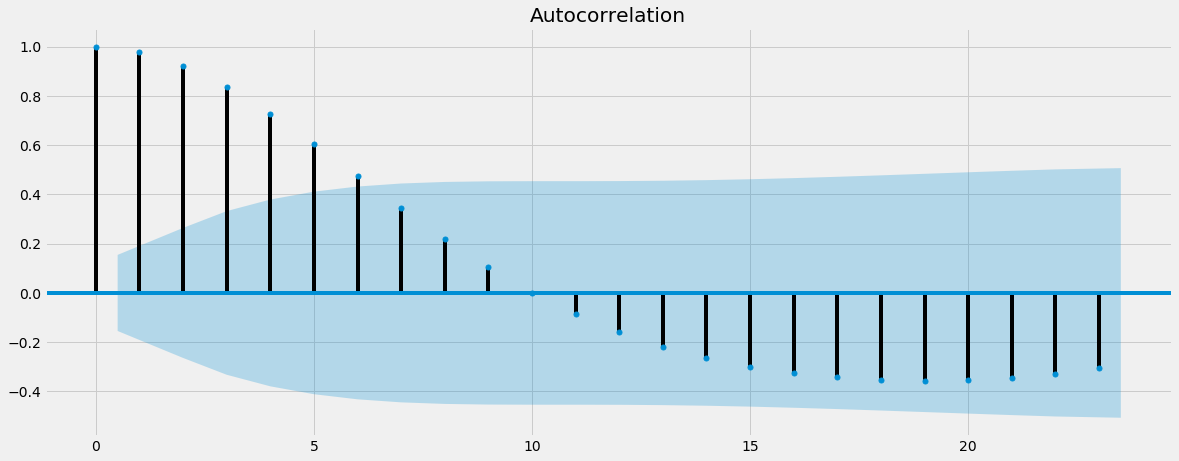

<Figure size 1500x500 with 0 Axes>

In [29]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

You have seven significant autocorrelations here (those that run beyond the blue border), but for now, you can take a more conservative approach and see what the output is like at q = 3. (It’s advisable to start with fewer terms as opposed to more and adjust accordingly further down the line as you begin testing the model.)

### 2. Splitting the Data

In [46]:
# Split the data

train = data_diff['Value'][:121]
test = data_diff['Value'][120:]

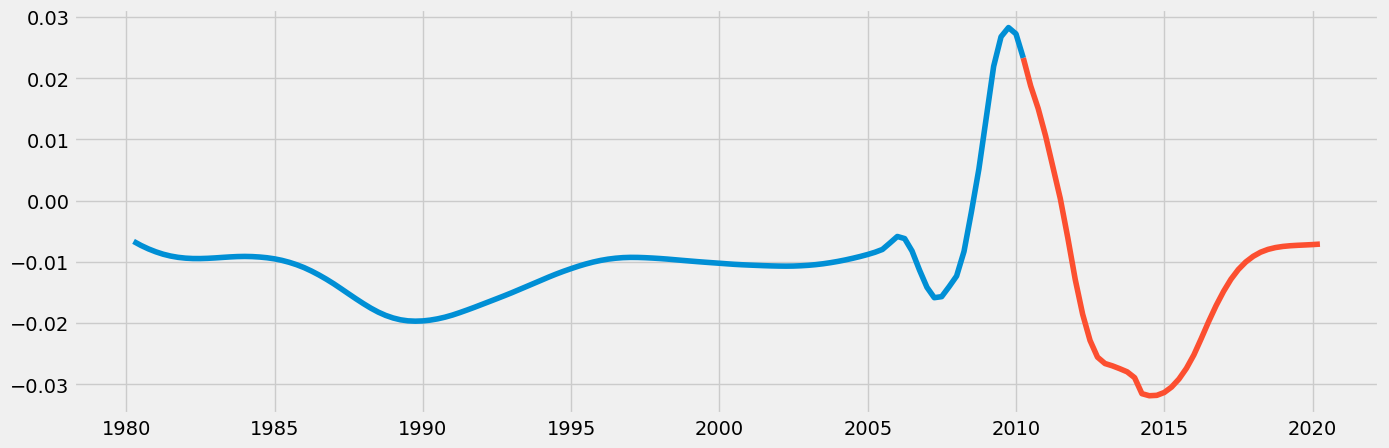

In [32]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [33]:
test.shape

(41,)

### 3. Running and Fitting the Model

In [35]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  120
Model:                 ARIMA(5, 1, 3)   Log Likelihood                 814.691
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 08 Jun 2020   AIC                          -1609.381
Time:                        14:58:21   BIC                          -1581.506
Sample:                    07-01-1980   HQIC                         -1598.061
                         - 04-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.693      0.488      -0.000       0.001
ar.L1.D.Value     1.1915      0.096     12.353      0.000       1.002       1.381
ar.L2.D.Value    -0.9189      0.119     

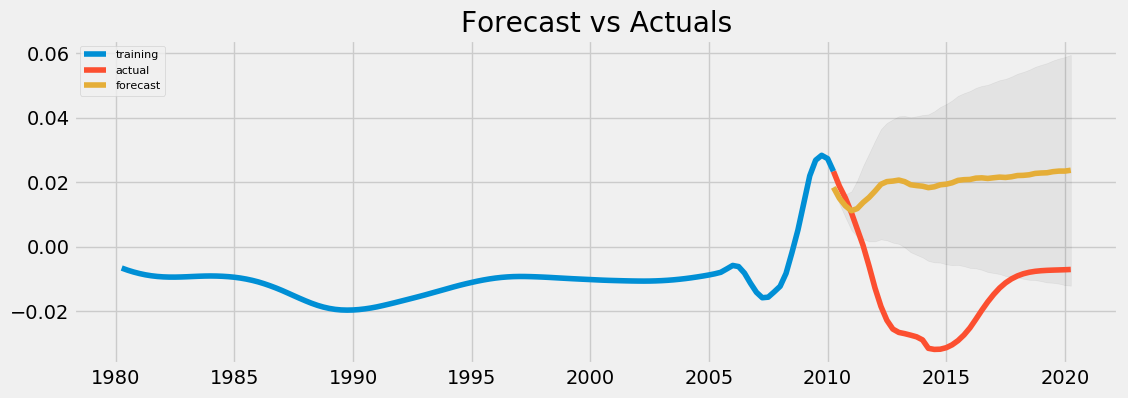

In [36]:
model = ARIMA(train, order=(5, 1, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### 4. Iterating

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  120
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 779.596
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 08 Jun 2020   AIC                          -1547.192
Time:                        14:58:24   BIC                          -1530.467
Sample:                    07-01-1980   HQIC                         -1540.400
                         - 04-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.335e-05      0.000      0.309      0.758      -0.000       0.001
ar.L1.D.Value     1.2946      0.092     14.115      0.000       1.115       1.474
ar.L2.D.Value    -0.2727      0.150     

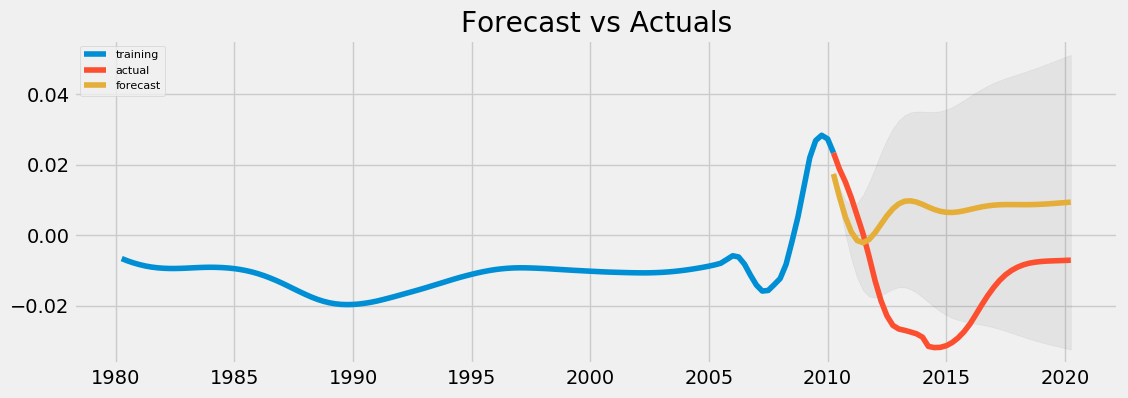

In [37]:
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% conf

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  120
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 784.247
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 08 Jun 2020   AIC                          -1558.494
Time:                        14:58:24   BIC                          -1544.556
Sample:                    07-01-1980   HQIC                         -1552.834
                         - 04-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.959e-05      0.001     -0.039      0.969      -0.001       0.001
ar.L1.D.Value     0.7704      0.065     11.856      0.000       0.643       0.898
ma.L1.D.Value     1.9517      0.041     

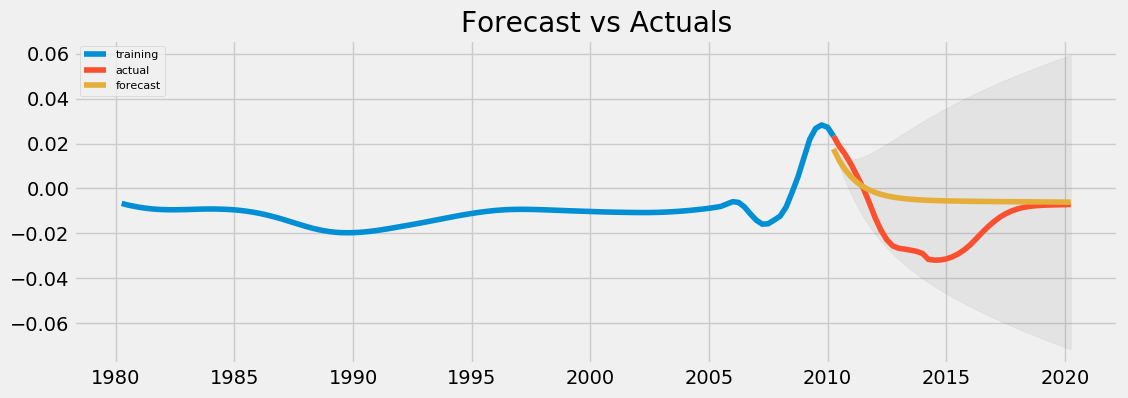

In [38]:
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% conf

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()